In [47]:
import scipy as sp
import scipy.optimize as optimize
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import sys
import os
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Scenario
Valuing lower bound load more

In [48]:
# The formula
'p = (T_p*S - T_s*L_s)/1.2 - L_g*T_g/0.95'

'p = (T_p*S - T_s*L_s)/1.2 - L_g*T_g/0.95'

In [49]:
def injection(x):
    """The injection function"""

    L_g = x[0]
    T_g = x[1]
    T_p = x[2]
    S = x[3]
    T_s = x[4]
    L_s = x[5]


    return (365*L_g*T_g/0.95 - (T_p*S - 365*T_s*L_s)/1.2)

In [50]:
# Solar injection with credit is capped at 130% of consumption
def constraint(x):
    return (1.1*365*x[0]*x[1]/0.95 - (x[2]*x[3] - 365*x[4]*x[5])/1.2)
Con = {'type':'ineq', 'fun':constraint}
Cons = [Con]

In [51]:
# Factor: kWh/kWp; 12 month; number obtained from Helioscope
B_T_p = (1173,1263)

# Load charged by Grid
B_L_g = (0, 238.5)
B_T_g = (2,10)
# Load charged by solar, bound
B_L_s = (0,388.5) 
B_T_s = (0, 6)


B_S_500 = (500,500)
B_S_520 = (520,520)
B_S_540 = (540,540)
B_S_560 = (560,560)
B_S_580 = (580,580)
B_S_600 = (600,600)



Bounds_500 = [B_L_g, B_T_g, 
          B_T_p, B_S_500,
          B_T_s, B_L_s]

In [52]:
ig_500_1 = [0, 3, 
          1250, 500,
         5, 300]
sol_annual_500_1 = minimize(injection, ig_500_1, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_1.fun, '\nParameter Values:', sol_annual_500_1.x)

Result: -47580.064188519726 
Parameter Values: [1.50304439e+02 8.28676530e+00 1.26299998e+03 5.00000000e+02
 2.20413877e-03 1.80883758e+02]


In [53]:
ig_500_2 = [65.4, 3, 
          1230, 500,
         5, 250]
sol_annual_500_2 = minimize(injection, ig_500_2, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_2.fun, '\nParameter Values:', sol_annual_500_2.x)

Result: -43682.70158722723 
Parameter Values: [1.34387277e+02 8.91248105e+00 1.25962100e+03 5.00000000e+02
 4.37355896e-01 1.57718803e+02]


In [54]:
ig_500_3 = [157.5, 3, 
          1210, 500,
         5, 200]
sol_annual_500_3 = minimize(injection, ig_500_3, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_3.fun, '\nParameter Values:', sol_annual_500_3.x)

Result: -51431.18746947026 
Parameter Values: [1.81335283e+02 6.81312107e+00 1.26300000e+03 5.00000000e+02
 1.04033041e-02 4.49915467e+01]


In [55]:
ig_500_4 = [200, 3, 
          1190, 500,
         5, 150]
sol_annual_500_4 = minimize(injection, ig_500_4, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_4.fun, '\nParameter Values:', sol_annual_500_4.x)

Result: -38368.97315587936 
Parameter Values: [ 200.0822622     5.48852634 1227.14339441  500.            2.37743758
   70.55007128]


In [56]:
ig_500_5 = [238.5, 3, 
          1180, 500,
         5, 100]
sol_annual_500_5 = minimize(injection, ig_500_5, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_5.fun, '\nParameter Values:', sol_annual_500_5.x)

Result: -48511.79168230691 
Parameter Values: [2.38458626e+02 5.21319129e+00 1.26272542e+03 5.00000000e+02
 0.00000000e+00 2.95905180e-01]


In [57]:
Bounds_520 = [B_L_g, B_T_g, 
          B_T_p, B_S_520,
          B_T_s, B_L_s]
ig_520_1 = [0, 3, 
          1250, 520,
         5, 300]
sol_annual_520_1 = minimize(injection, ig_520_1, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_1.fun, '\nParameter Values:', sol_annual_520_1.x)

Result: -85416.66666666667 
Parameter Values: [   0.    3. 1250.  520.    5.  300.]


In [58]:
ig_520_2 = [65.4, 3, 
          1230, 520,
         5, 250]
sol_annual_520_2 = minimize(injection, ig_520_2, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_2.fun, '\nParameter Values:', sol_annual_520_2.x)

Result: -48083.79370378511 
Parameter Values: [1.37704083e+02 8.15509293e+00 1.25380689e+03 5.20000000e+02
 1.17389727e+00 1.78591904e+02]


In [59]:
ig_520_3 = [157.5, 3, 
          1210, 520,
         5, 200]
sol_annual_520_3 = minimize(injection, ig_520_3, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_3.fun, '\nParameter Values:', sol_annual_520_3.x)

Result: -40159.85591276584 
Parameter Values: [ 175.13251537    6.73354842 1245.35892877  520.            1.60239057
   95.22139581]


In [60]:
ig_520_4 = [200, 3, 
          1190, 520,
         5, 150]
sol_annual_520_4 = minimize(injection, ig_520_4, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_4.fun, '\nParameter Values:', sol_annual_520_4.x)

Result: -57015.35087719298 
Parameter Values: [ 200.    3. 1190.  520.    5.  150.]


In [61]:
ig_520_5 = [238.5, 3, 
          1180, 520,
         5, 100]
sol_annual_520_5 = minimize(injection, ig_520_5, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_5.fun, '\nParameter Values:', sol_annual_520_5.x)

Result: -80461.24234422273 
Parameter Values: [ 238.49874867    3.75443878 1188.964496    520.            3.86179341
   77.23586823]


In [62]:
Bounds_540 = [B_L_g, B_T_g, 
          B_T_p, B_S_540,
          B_T_s, B_L_s]
ig_540_1 = [0, 3, 
          1250, 540,
         5, 300]
sol_annual_540_1 = minimize(injection, ig_540_1, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_1.fun, '\nParameter Values:', sol_annual_540_1.x)

Result: -106250.0 
Parameter Values: [   0.    3. 1250.  540.    5.  300.]


In [63]:
ig_540_2 = [65.4, 3, 
          1230, 540,
         5, 250]
sol_annual_540_2 = minimize(injection, ig_540_2, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_2.fun, '\nParameter Values:', sol_annual_540_2.x)

Result: -54276.9131769503 
Parameter Values: [1.77260038e+02 7.36373582e+00 1.26031302e+03 5.40000000e+02
 3.25197231e-01 1.14801035e+02]


In [64]:
ig_540_3 = [157.5, 3, 
          1210, 540,
         5, 200]
sol_annual_540_3 = minimize(injection, ig_540_3, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_3.fun, '\nParameter Values:', sol_annual_540_3.x)

Result: -52623.71309382486 
Parameter Values: [ 196.53064171    6.82814636 1262.69151461  540.            0.
   35.31887659]


In [65]:
ig_540_4 = [200, 3, 
          1190, 540,
         5, 150]
sol_annual_540_4 = minimize(injection, ig_540_4, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_4.fun, '\nParameter Values:', sol_annual_540_4.x)

Result: -60318.406132277276 
Parameter Values: [ 200.11116268    6.12682628 1238.10295336  540.            1.621079
   52.25949469]


In [66]:
ig_540_5 = [238.5, 3, 
          1180, 520,
         5, 100]
sol_annual_540_5 = minimize(injection, ig_540_5, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_5.fun, '\nParameter Values:', sol_annual_540_5.x)

Result: -68436.21008711203 
Parameter Values: [ 238.49279144    4.78016147 1219.02948535  530.7560116     2.31264647
   46.51976429]


In [67]:
Bounds_560 = [B_L_g, B_T_g, 
          B_T_p, B_S_560,
          B_T_s, B_L_s]
ig_560_1 = [0, 3, 
          1250, 560,
         5, 300]
sol_annual_560_1 = minimize(injection, ig_560_1, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_1.fun, '\nParameter Values:', sol_annual_560_1.x)

Result: -127083.33333333334 
Parameter Values: [   0.    3. 1250.  560.    5.  300.]


In [68]:
ig_560_2 = [65.4, 3, 
          1230, 560,
         5, 250]
sol_annual_560_2 = minimize(injection, ig_560_2, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_2.fun, '\nParameter Values:', sol_annual_560_2.x)

Result: -59319.832251146494 
Parameter Values: [ 146.09087694    8.05087796 1252.08302954  560.            1.33138696
  180.49180081]


In [69]:
ig_560_3 = [157.5, 3, 
          1210, 560,
         5, 200]
sol_annual_560_3 = minimize(injection, ig_560_3, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_3.fun, '\nParameter Values:', sol_annual_560_3.x)

Result: -55588.38758882275 
Parameter Values: [1.76204137e+02 7.47093042e+00 1.25220492e+03 5.60000000e+02
 9.61242847e-01 7.86508155e+01]


In [70]:
ig_560_4 = [200, 3, 
          1190, 560,
         5, 150]
sol_annual_560_4 = minimize(injection, ig_560_4, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_4.fun, '\nParameter Values:', sol_annual_560_4.x)

Result: -64452.56614109146 
Parameter Values: [ 200.12296316    6.47175735 1242.09859049  560.            1.33574303
   43.28016467]


In [71]:
ig_560_5 = [238.5, 3, 
          1180, 560,
         5, 100]
sol_annual_560_5 = minimize(injection, ig_560_5, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_5.fun, '\nParameter Values:', sol_annual_560_5.x)

Result: -85653.74965758849 
Parameter Values: [ 238.4910512     4.91330635 1218.15323429  560.            2.3162159
   46.28386011]


In [72]:
Bounds_580 = [B_L_g, B_T_g, 
          B_T_p, B_S_580,
          B_T_s, B_L_s]
ig_580_1 = [0, 3, 
          1250, 580,
         5, 300]
sol_annual_580_1 = minimize(injection, ig_580_1, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_1.fun, '\nParameter Values:', sol_annual_580_1.x)

Result: -147916.6666666667 
Parameter Values: [   0.    3. 1250.  580.    5.  300.]


In [73]:
Bounds_580 = [B_L_g, B_T_g, 
          B_T_p, B_S_580,
          B_T_s, B_L_s]
ig_580_2 = [65.4, 3, 
          1230, 580,
         5, 250]
sol_annual_580_2 = minimize(injection, ig_580_2, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_2.fun, '\nParameter Values:', sol_annual_580_2.x)

Result: -63903.841575379134 
Parameter Values: [ 195.25347866    7.28549068 1263.          580.            0.
  140.56742683]


In [74]:
ig_580_3 = [157.5, 3, 
          1210, 580,
         5, 200]
sol_annual_580_3 = minimize(injection, ig_580_3, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_3.fun, '\nParameter Values:', sol_annual_580_3.x)

Result: -67301.82862184814 
Parameter Values: [ 187.04455114    6.97385202 1247.76945277  580.            1.37604199
   82.70164902]


In [75]:
ig_580_4 = [200, 3, 
          1190, 580,
         5, 150]
sol_annual_580_4 = minimize(injection, ig_580_4, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_4.fun, '\nParameter Values:', sol_annual_580_4.x)

Result: -65029.81499509525 
Parameter Values: [2.00158658e+02 6.94736094e+00 1.25183269e+03 5.80000000e+02
 7.37619230e-01 2.56254737e+01]


In [76]:
ig_580_5 = [238.5, 3, 
          1180, 580,
         5, 100]
sol_annual_580_5 = minimize(injection, ig_580_5, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_5.fun, '\nParameter Values:', sol_annual_580_5.x)

Result: -109602.28713422903 
Parameter Values: [ 238.49662542    4.45366704 1204.04751883  580.            3.2528576
   64.93917508]


In [77]:
Bounds_600 = [B_L_g, B_T_g, 
          B_T_p, B_S_600,
          B_T_s, B_L_s]
ig_600_1 = [0, 3, 
          1250, 600,
         5, 300]

sol_annual_600_1 = minimize(injection, ig_600_1, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_1.fun, '\nParameter Values:', sol_annual_600_1.x)

Result: -168750.0 
Parameter Values: [   0.    3. 1250.  600.    5.  300.]


In [78]:
Bounds_600 = [B_L_g, B_T_g, 
          B_T_p, B_S_600,
          B_T_s, B_L_s]
ig_600_2 = [65.4, 3, 
          1230, 600,
         5, 250]

sol_annual_600_2 = minimize(injection, ig_600_2, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_2.fun, '\nParameter Values:', sol_annual_600_2.x)

Result: -82374.01718969515 
Parameter Values: [ 157.34871685    8.09965708 1252.68805578  600.            1.28100594
  139.37241705]


In [79]:
ig_600_3 = [157.5, 3, 
          1210, 580,
         5, 200]
sol_annual_600_3 = minimize(injection, ig_600_3, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_3.fun, '\nParameter Values:', sol_annual_600_3.x)

Result: -68646.33748161356 
Parameter Values: [ 179.5434906     7.15278249 1245.619408    594.06559655    1.60365428
  111.90855051]


In [80]:
ig_600_4 = [200, 3, 
          1190, 600,
         5, 150]
sol_annual_600_4 = minimize(injection, ig_600_4, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_4.fun, '\nParameter Values:', sol_annual_600_4.x)

Result: -84117.70870024594 
Parameter Values: [ 200.12187258    6.50012102 1233.75554068  600.            1.8436288
   58.79894889]


In [85]:
ig_600_5 = [238.5, 3, 
          1180, 600,
         5, 100]
sol_annual_600_5 = minimize(injection, ig_600_5, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_5.fun, '\nParameter Values:', sol_annual_600_5.x)

Result: -163014.03508771933 
Parameter Values: [ 238.5    3.  1180.   600.     5.   100. ]


In [86]:
a = {'Nameplate':[500,520,540,560,580,600], 
    'Net Injection-1':[sol_annual_500_1.fun, sol_annual_520_1.fun, sol_annual_540_1.fun, sol_annual_560_1.fun,
                     sol_annual_580_1.fun, sol_annual_600_1.fun],
    'Net Injection-2':[sol_annual_500_2.fun, sol_annual_520_2.fun, sol_annual_540_2.fun, sol_annual_560_2.fun,
                     sol_annual_580_2.fun, sol_annual_600_2.fun],
    'Net Injection-3':[sol_annual_500_3.fun, sol_annual_520_3.fun, sol_annual_540_3.fun, sol_annual_560_3.fun,
                     sol_annual_580_3.fun, sol_annual_600_3.fun],
    'Net Injection-4':[sol_annual_500_4.fun, sol_annual_520_4.fun, sol_annual_540_4.fun, sol_annual_560_4.fun,
                     sol_annual_580_4.fun, sol_annual_600_4.fun],
    'Net Injection-5':[sol_annual_500_5.fun, sol_annual_520_5.fun, sol_annual_540_5.fun, sol_annual_560_5.fun,
                     sol_annual_580_5.fun, sol_annual_600_5.fun]}
data = pd.DataFrame(a)
data

,Nameplate,Net Injection-1,Net Injection-2,Net Injection-3,Net Injection-4,Net Injection-5
0,500,-47580.064189,-43682.701587,-51431.187469,-38368.973156,-48511.791682
1,520,-85416.666667,-48083.793704,-40159.855913,-57015.350877,-80461.242344
2,540,-106250.000000,-54276.913177,-52623.713094,-60318.406132,-68436.210087
3,560,-127083.333333,-59319.832251,-55588.387589,-64452.566141,-85653.749658
4,580,-147916.666667,-63903.841575,-67301.828622,-65029.814995,-109602.287134
5,600,-168750.000000,-82374.017190,-68646.337482,-84117.708700,-163014.035088


In [89]:
data['Net Injection-1'] = np.log10(abs(data['Net Injection-1']))
data['Net Injection-2'] = np.log10(abs(data['Net Injection-2']))
data['Net Injection-3'] = np.log10(abs(data['Net Injection-3']))
data['Net Injection-4'] = np.log10(abs(data['Net Injection-4']))
data['Net Injection-5'] = np.log10(abs(data['Net Injection-5']))
data

,Nameplate,Net Injection-1,Net Injection-2,Net Injection-3,Net Injection-4,Net Injection-5
0,500,4.677425,4.640309,4.711227,4.583980,4.685847
1,520,4.931543,4.681999,4.603792,4.755992,4.905587
2,540,5.026329,4.734615,4.721181,4.780450,4.835286
3,560,5.104089,4.773200,4.744984,4.809240,4.932746
4,580,5.170017,4.805527,4.828027,4.813113,5.039820
5,600,5.227244,4.915790,4.836617,4.924887,5.212225


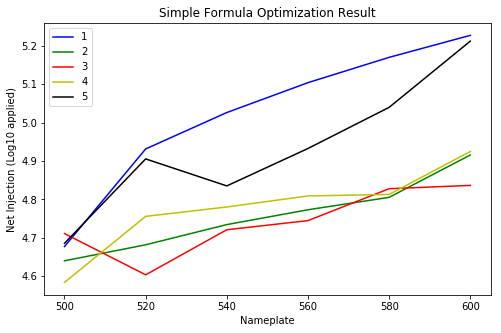

In [93]:
pl.figure(figsize=(8,5))
pl.plot(data['Nameplate'], data['Net Injection-1'], '-', c='b',label='1')
pl.plot(data['Nameplate'], data['Net Injection-2'], '-', c='g',label='2')
pl.plot(data['Nameplate'], data['Net Injection-3'], '-', c='r', label='3')
pl.plot(data['Nameplate'], data['Net Injection-4'], '-', c='y', label='4')
pl.plot(data['Nameplate'], data['Net Injection-5'], '-', c='black', label='5')

pl.xlabel('Nameplate')
pl.ylabel('Net Injection (Log10 applied)')
pl.title('Simple Formula Optimization Result(Log10 applied)')
pl.legend()